In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S1/Office_Cristina-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [15]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 4s 21ms/step - loss: 4.1725
Epoch 2/300
12/12 [==============================] - 0s 19ms/step - loss: 1.1393
Epoch 3/300
12/12 [==============================] - 0s 21ms/step - loss: 1.0344
Epoch 4/300
12/12 [==============================] - 0s 19ms/step - loss: 0.9064
Epoch 5/300
12/12 [==============================] - 0s 19ms/step - loss: 0.8478
Epoch 6/300
12/12 [==============================] - 0s 20ms/step - loss: 0.7432
Epoch 7/300
12/12 [==============================] - 0s 20ms/step - loss: 0.5959
Epoch 8/300
12/12 [==============================] - 0s 20ms/step - loss: 0.4932
Epoch 9/300
12/12 [==============================] - 0s 21ms/step - loss: 0.4412
Epoch 10/300
12/12 [==============================] - 0s 19ms/step - loss: 0.4216
Epoch 11/300
12/12 [==============================] - 0s 20ms/step - loss: 0.4198
Epoch 12/300
12/12 [==============================] - 0s 18ms/step - loss: 0.4093
Epoch 13/300
12/12 [=====

In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 0.5151610966945304
RMSE for BiLSTM Model for testing is: 0.5861517032795804
MAE for BiLSTM Model for training is: 0.40522204301927844
MAE for BiLSTM Model for testing is: 0.47158057490593686
MAPE for BiLSTM Model for training is: 0.11423905554994668
MAPE for BiLSTM Model for testing is: 0.15179256311750766


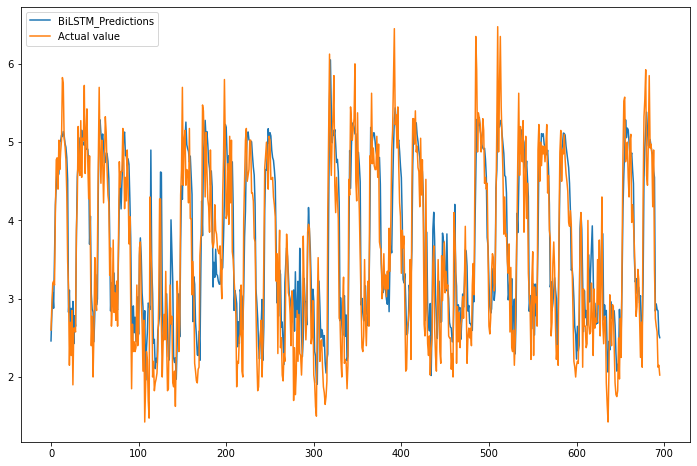

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.5999999]), array([2.4612021], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.13879776]), array([0.09823084]), array([0.12183332]), array([0.34598565]), array([-0.38752174]), array([-0.09992313]), array([0.32372808]), array([0.15724039]), array([-0.1724205]), array([0.42975759]), array([-0.35117483]), array([-0.14197731]), array([-0.06492376]), array([0.75393772]), array([0.61412001]), array([-0.0373702]), array([-0.03454971]), array([-0.16104794]), array([-0.45467138]), array([-1.04019213]), array([0.29759407]), array([-0.95994186]), array([0.12362838]), array([-0.60232759]), array([0.25454426]), array([-1.06574261]), array([0.20072532]), array([-0.15762901]), array([-0.0713408]), array([0.09113002]), array([-0.30688858]), array([0.46402216]), array([-0.40471697]), array([-0.25100136]), array([0.43125486]), array([-0.60341501]), array([0.04401016]), array([0.02761221]), array([0.76577902]), array([-0.43670082]), array([0.21760654]), array([0.51243734]), array([-0.18407011]), array([-0.46632338]), array([1.12858129]), array([-0.37969184]), array([-0.66

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.83142948]), array([-1.91221023]))

In [23]:
max(d1)-min(d1)

array([3.74363971])

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(434, 262)